In [5]:
%pip install ultralytics opencv-python tqdm

Note: you may need to restart the kernel to use updated packages.


In [6]:
from ultralytics import YOLO
import os

# Define dataset path
dataset_path = "/ML/ubl vs non-ubl/data_dir"

# Check if directories exist
assert os.path.exists(f"{dataset_path}/train/images"), "Train images folder missing!"
assert os.path.exists(f"{dataset_path}/train/labels"), "Train labels folder missing!"
assert os.path.exists(f"{dataset_path}/valid/images"), "Validation images folder missing!"
assert os.path.exists(f"{dataset_path}/valid/labels"), "Validation labels folder missing!"
assert os.path.exists(f"{dataset_path}/test/images"), "Test images folder missing!"

print("✅ Dataset structure verified.")

✅ Dataset structure verified.


In [8]:
data_yaml_path = f"{dataset_path}/data.yaml"

# Correcting paths inside data.yaml
with open(data_yaml_path, "w") as f:
    f.write(f"""
train: {dataset_path}/train/images
val: {dataset_path}/valid/images
test: {dataset_path}/test/images

nc: 2
names: ['non-ubl','ubl']
    """)

print("✅ data.yaml correctly updated.")

✅ data.yaml correctly updated.


In [9]:
import torch
print(torch.cuda.is_available())  # Should return True if CUDA is available
print(torch.cuda.device_count())  # Should return the number of GPUs available
print(torch.version.cuda)  # Check installed CUDA version

True
1
12.8


In [10]:
# Load YOLOv8 model
model = YOLO("yolov8s.pt")  # Using YOLOv8-Small for best speed-accuracy tradeoff

# Train the model
model.train(
    data=f"{dataset_path}/data.yaml",  # Path to updated data.yaml
    epochs=200,                         # Number of training epochs
    batch=16,                           # Batch size (adjust based on your system)
    imgsz=640,                          # Input image size
    device="cuda",
    augment=True                        # Use GPU (if available) for training
)

print("✅ Training completed.")
# Save the trained model
model.save("ublVSnon_ublModel_v1.pt")

New https://pypi.org/project/ultralytics/8.3.90 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.89  Python-3.13.2 torch-2.7.0.dev20250311+cu128 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=/ML/ubl vs non-ubl/data_dir/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False

train: Scanning E:\ML\ubl vs non-ubl\data_dir\train\labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]

train: WARNING  E:\ML\ubl vs non-ubl\data_dir\train\images\sh31_jpg.rf.67259d483023d6901113422d9f4f7b78.jpg: 39 duplicate labels removed



val: Scanning E:\ML\ubl vs non-ubl\data_dir\valid\labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      4.73G      2.389      4.395      1.846        833        640: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         25       1582     0.0507      0.127     0.0286     0.0158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      8.09G      2.285      4.026      1.774        734        640: 100%|██████████| 4/4 [00:13<00:00,  3.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         25       1582      0.199      0.303      0.144      0.075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200       4.7G       1.71      2.215      1.393        824        640: 100%|██████████| 4/4 [00:01<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         25       1582      0.311      0.502      0.298      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200       5.3G      1.581      1.604      1.244        735        640: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         25       1582      0.264      0.647      0.291       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      6.08G      1.513      1.333        1.2       1138        640: 100%|██████████| 4/4 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         25       1582      0.313      0.641       0.34      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      6.08G      1.581      1.334       1.24       1291        640: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         25       1582      0.379      0.641      0.398      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      6.08G      1.427      1.148       1.16        988        640: 100%|██████████| 4/4 [00:00<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         25       1582      0.456      0.586      0.463      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200       6.1G      1.514      1.106      1.202        940        640: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         25       1582      0.432      0.552      0.428      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200       6.1G      1.431      1.015      1.179        960        640: 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         25       1582      0.441      0.464      0.417      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      6.12G      1.454      1.027      1.165       1176        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         25       1582      0.406       0.51      0.423      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      6.13G      1.396     0.9985      1.166        811        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         25       1582      0.546      0.461      0.486      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      6.13G      1.488          1      1.164        655        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         25       1582      0.562      0.525      0.531      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      6.15G      1.443     0.9717      1.159        930        640: 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         25       1582      0.503      0.569      0.468      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      6.17G      1.344     0.9353       1.13        649        640: 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         25       1582      0.505      0.532      0.499      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      6.17G      1.368     0.9159       1.16        840        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         25       1582      0.494      0.618      0.583      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      6.19G      1.408     0.9056      1.153        663        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         25       1582      0.514      0.633      0.603      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      6.21G      1.408     0.9211      1.144       1027        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         25       1582      0.584      0.621      0.622      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      6.21G      1.412     0.8908      1.133        925        640: 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         25       1582      0.488      0.652      0.568      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      6.23G      1.338     0.8075      1.101        822        640: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         25       1582      0.552      0.594      0.581        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      6.99G      1.391     0.8661      1.111       1181        640: 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         25       1582      0.616      0.598      0.605      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      7.75G      1.379     0.8369      1.128        687        640: 100%|██████████| 4/4 [00:06<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         25       1582      0.665      0.609       0.62      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      4.29G      1.417     0.8404      1.179        776        640: 100%|██████████| 4/4 [00:00<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         25       1582      0.656      0.584      0.625       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      5.16G      1.405     0.8352      1.145        921        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         25       1582      0.636      0.618      0.636      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      6.21G      1.324     0.7748      1.114        620        640: 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         25       1582      0.616      0.647      0.627      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      6.21G      1.424      0.773      1.143        934        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         25       1582      0.594      0.635      0.616      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      6.21G      1.337     0.7451      1.113        650        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         25       1582      0.572      0.632      0.597      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      6.21G       1.38     0.7802      1.137        836        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         25       1582      0.583      0.629      0.605      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      6.21G      1.381     0.7689      1.125        737        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         25       1582      0.611      0.617      0.616      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      6.23G      1.349     0.7419      1.104       1266        640: 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         25       1582      0.637      0.621      0.644      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      6.23G      1.344     0.7138      1.109        918        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         25       1582      0.621      0.666      0.665      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      6.23G      1.282     0.7143      1.107        938        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         25       1582      0.631      0.638      0.659      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      6.27G      1.284      0.673      1.075        777        640: 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         25       1582      0.647       0.61       0.65      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      6.27G      1.319     0.6979      1.104        897        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         25       1582      0.659      0.627      0.652      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      6.27G      1.275     0.6814      1.062        991        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         25       1582      0.644      0.633      0.648      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200       6.3G      1.269     0.6804      1.068       1019        640: 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         25       1582      0.668       0.62      0.656      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200       6.3G      1.253     0.6913      1.096       1045        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         25       1582      0.686      0.629      0.688       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200       6.3G      1.283     0.6913      1.112        904        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         25       1582      0.686      0.659      0.698      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      6.34G       1.25     0.6989      1.086        472        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         25       1582      0.696      0.693      0.718      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      6.34G       1.29     0.6829      1.108        743        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         25       1582      0.678      0.656      0.703      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      6.34G       1.24     0.6625      1.077        722        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         25       1582      0.632      0.628      0.662      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      6.38G      1.307     0.7117        1.1        765        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         25       1582      0.636      0.648      0.662      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      6.38G      1.256     0.6919      1.109        594        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         25       1582      0.674      0.688      0.694      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      6.38G      1.252      0.675      1.086        592        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         25       1582      0.664      0.683      0.686       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      6.41G      1.231     0.6543      1.091        829        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         25       1582      0.645       0.69      0.687      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      6.42G      1.278     0.6865      1.094        919        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         25       1582      0.669      0.691      0.701      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      6.42G      1.268     0.6735      1.075        779        640: 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         25       1582      0.696      0.684      0.712      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      6.45G      1.194     0.6353      1.039        785        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         25       1582      0.721      0.706      0.731      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      6.45G      1.211     0.6484      1.076        588        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         25       1582       0.73      0.719      0.742      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      6.45G      1.198      0.632      1.063       1170        640: 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         25       1582      0.715      0.713      0.748      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      6.49G       1.17     0.6201      1.054        680        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         25       1582      0.695      0.685      0.734      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      7.21G      1.198     0.6425      1.047        849        640: 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         25       1582      0.732      0.673      0.742       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      4.65G      1.196      0.596      1.044        767        640: 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         25       1582      0.692      0.715      0.732      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      5.23G      1.207     0.6123      1.046       1013        640: 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         25       1582      0.672      0.729      0.724       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      6.01G      1.199     0.6049      1.034        932        640: 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         25       1582      0.682      0.701      0.716      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      6.01G      1.206     0.6337      1.047        919        640: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         25       1582      0.667      0.672      0.699      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      6.01G      1.206     0.6072      1.035        889        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         25       1582      0.651      0.679      0.678      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      6.01G      1.227     0.6107      1.041        893        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         25       1582       0.66       0.68      0.668      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      6.01G       1.23     0.6071      1.084        847        640: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         25       1582      0.676      0.647      0.674      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      6.01G      1.198      0.596      1.045        724        640: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         25       1582      0.696      0.639        0.7       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      6.01G      1.204     0.6216      1.063        944        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         25       1582      0.685      0.697      0.721      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      6.01G      1.109     0.5632      1.014        853        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         25       1582      0.697      0.702      0.728      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      6.04G      1.108     0.5725      1.053        669        640: 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         25       1582      0.692      0.674      0.723      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      6.04G      1.189      0.576       1.03        837        640: 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         25       1582      0.645      0.697      0.716      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      6.04G      1.143     0.5707      1.024       1049        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         25       1582      0.701      0.675      0.728      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      6.07G      1.164     0.5849      1.032        813        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         25       1582      0.716      0.688      0.741      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      6.08G      1.159     0.5764      1.045        915        640: 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         25       1582      0.705      0.731      0.754      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      6.08G      1.146      0.564      1.034        716        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         25       1582       0.73      0.726      0.763      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      6.11G      1.133     0.5867      1.036        782        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         25       1582      0.703      0.756      0.773      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      6.11G      1.145     0.5669      1.019       1126        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         25       1582       0.72      0.726      0.779      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      6.12G      1.125     0.5619      1.011        801        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         25       1582      0.786      0.684      0.778      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      6.15G      1.139      0.578      1.048        493        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         25       1582      0.747      0.723      0.777      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      6.15G      1.137     0.5603      1.027        866        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         25       1582      0.713      0.765      0.777      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      6.15G      1.135     0.5757      1.001        937        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         25       1582       0.73      0.772       0.79      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      6.19G      1.141     0.5615      1.011        848        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         25       1582      0.726      0.779      0.796      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      6.19G      1.062     0.5355       1.01        906        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         25       1582      0.717      0.774      0.785      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      6.19G      1.123     0.5432     0.9979       1532        640: 100%|██████████| 4/4 [00:00<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         25       1582      0.731      0.739      0.779      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      6.22G      1.097     0.5704       1.01        979        640: 100%|██████████| 4/4 [00:00<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         25       1582      0.783      0.718      0.793      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      6.22G      1.119     0.5584      1.021        912        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         25       1582      0.782       0.72      0.799      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      6.22G      1.094     0.5329     0.9949        960        640: 100%|██████████| 4/4 [00:00<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         25       1582      0.761      0.742      0.796      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      6.26G      1.071      0.535          1       1094        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         25       1582      0.784      0.713      0.791      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      6.26G       1.09     0.5327      1.015        753        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         25       1582      0.759      0.735      0.785      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      6.26G      1.138     0.5718      1.058        513        640: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         25       1582       0.78      0.714      0.781      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      6.29G      1.096     0.5599      1.009        854        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         25       1582      0.786      0.719      0.774      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200       6.3G      1.067      0.537      1.004        744        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         25       1582      0.752      0.742      0.772      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200       6.3G      1.106     0.5549      1.032        666        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         25       1582      0.769      0.726      0.777      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      6.33G      1.072     0.5235      1.004        764        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         25       1582      0.773      0.721      0.777      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      6.33G      1.093     0.5537      1.006        654        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         25       1582       0.78      0.744      0.785      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      6.33G      1.022     0.5013     0.9973        666        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         25       1582      0.776      0.741      0.784      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      6.37G      1.059     0.5224      1.008        776        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         25       1582      0.752      0.762      0.777      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      6.37G      1.025      0.514     0.9934        782        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         25       1582      0.753      0.747      0.778      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      6.37G      1.018     0.4984     0.9975        874        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         25       1582      0.741      0.754       0.78      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      6.37G      1.036     0.5205      1.003        581        640: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         25       1582      0.755      0.766        0.8      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      6.37G      1.081     0.5199     0.9867        977        640: 100%|██████████| 4/4 [00:00<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         25       1582       0.77      0.749      0.799      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      6.37G      1.003     0.5118     0.9689        820        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         25       1582      0.767      0.758      0.796      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      6.37G     0.9889     0.4846     0.9725        731        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         25       1582      0.769      0.741      0.791      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      6.37G      1.006     0.4908     0.9878        787        640: 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         25       1582      0.775      0.712       0.79      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      6.37G      1.048      0.521     0.9799        830        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         25       1582      0.717      0.759      0.778      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      6.37G      1.029     0.5021     0.9861        863        640: 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         25       1582      0.725      0.751      0.782      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      6.37G     0.9945     0.4964     0.9689        970        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         25       1582      0.752      0.731      0.783      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      6.37G      1.037      0.502     0.9789       1335        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         25       1582      0.778      0.715      0.788       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      6.37G      1.037     0.4937     0.9664        962        640: 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         25       1582      0.756      0.733      0.783      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      6.37G     0.9788     0.5034     0.9861        683        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         25       1582      0.758      0.712      0.771      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      6.37G     0.9972     0.4886     0.9634        883        640: 100%|██████████| 4/4 [00:00<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         25       1582      0.726      0.722      0.755      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      6.37G     0.9891     0.4853     0.9545       1268        640: 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         25       1582      0.765      0.691      0.745      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      6.37G     0.9487     0.4686     0.9607        837        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         25       1582       0.78       0.69      0.749      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      6.37G     0.9597     0.4637     0.9617       1023        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         25       1582      0.777      0.701      0.755      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      6.37G      0.981     0.4765     0.9629       1122        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         25       1582      0.761        0.7      0.755      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      6.37G     0.9765     0.4729     0.9728        640        640: 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         25       1582      0.746      0.716      0.754      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      6.37G      1.032     0.4952     0.9807       1188        640: 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         25       1582       0.76      0.708      0.754      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      6.37G      1.017     0.4943     0.9763        961        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         25       1582      0.766      0.707      0.754      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      6.37G     0.9689     0.4702      0.949        868        640: 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         25       1582       0.78      0.689      0.758      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      6.37G     0.9765     0.4802       0.99        688        640: 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         25       1582      0.776      0.706      0.766      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      6.37G     0.9736     0.4632     0.9644        889        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         25       1582      0.777      0.708      0.768      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      6.37G       0.94     0.4598     0.9577        686        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         25       1582      0.773      0.714       0.77      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      6.37G     0.9547     0.4686     0.9616        720        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         25       1582      0.764      0.709      0.765      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      6.37G     0.9444     0.4665     0.9583        552        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         25       1582      0.735      0.738      0.768      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      6.37G     0.9632     0.4691      0.971        956        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         25       1582      0.751      0.723      0.762      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      6.37G     0.9697     0.4728     0.9503       1115        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         25       1582      0.739      0.741      0.766      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      6.37G     0.9417     0.4624     0.9577        734        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         25       1582       0.75      0.735      0.771      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      6.37G     0.9498     0.4607     0.9661        909        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         25       1582      0.766      0.718      0.775      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      6.37G     0.9659     0.4671     0.9637        654        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         25       1582      0.751      0.732      0.772      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      6.37G     0.9288     0.4654     0.9751        582        640: 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         25       1582      0.741      0.743      0.771      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      6.37G     0.9509     0.4731     0.9527       1205        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         25       1582      0.728      0.744      0.764      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      6.37G     0.9273     0.4553     0.9589        726        640: 100%|██████████| 4/4 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         25       1582      0.735      0.736      0.762      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      6.37G     0.9434     0.4555      0.967        990        640: 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         25       1582      0.736      0.735      0.761      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      6.37G     0.9925     0.4757     0.9574       1130        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         25       1582      0.742      0.742      0.763      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      6.37G     0.9377     0.4636     0.9457        677        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         25       1582      0.746       0.77      0.779      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      6.37G     0.9701     0.4705     0.9635        913        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         25       1582      0.752      0.768      0.787      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      6.37G     0.9007     0.4538     0.9377       1046        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         25       1582      0.771      0.759      0.795      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      6.37G     0.9194     0.4544     0.9573        672        640: 100%|██████████| 4/4 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         25       1582      0.786      0.763      0.801      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      6.37G     0.9251     0.4602     0.9379       1321        640: 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         25       1582      0.803      0.755      0.806      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      6.37G     0.8662     0.4342     0.9327       1041        640: 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         25       1582      0.805      0.745      0.804      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      6.37G     0.8645     0.4337     0.9368        708        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         25       1582      0.786      0.752      0.796      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      6.37G      0.922     0.4423     0.9424       1009        640: 100%|██████████| 4/4 [00:00<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         25       1582      0.802      0.719       0.79      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      6.37G     0.9057     0.4439     0.9358        714        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         25       1582      0.769      0.741      0.783      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      6.37G     0.9412      0.463     0.9563        532        640: 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         25       1582      0.762      0.731      0.778      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      6.37G     0.8689     0.4348     0.9269        868        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         25       1582      0.762      0.726      0.776      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      6.37G     0.8766     0.4476     0.9421        771        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         25       1582      0.761      0.726      0.778      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      6.37G     0.9023     0.4463     0.9413       1313        640: 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         25       1582      0.759       0.73      0.784      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      6.37G     0.9059     0.4486     0.9379        977        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         25       1582      0.757      0.734      0.788      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      6.37G     0.9076     0.4616     0.9373       1359        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all         25       1582      0.781      0.713      0.786      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      6.37G     0.8838     0.4334     0.9257       1117        640: 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         25       1582      0.744      0.741      0.787      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      6.37G     0.8968     0.4425      0.935        896        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         25       1582      0.733      0.747      0.787       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      6.37G     0.8787     0.4464     0.9354        944        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         25       1582      0.771      0.706      0.784      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      6.37G      0.943     0.4488     0.9411       1262        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         25       1582      0.781      0.702      0.784      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      6.37G     0.8911      0.435     0.9341        915        640: 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         25       1582      0.782      0.697      0.775      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      6.37G     0.8614     0.4256     0.9283        842        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         25       1582      0.749      0.722      0.772      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      6.37G     0.8964     0.4411     0.9265        961        640: 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         25       1582      0.762      0.705      0.768      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      6.37G     0.8928     0.4327     0.9179        773        640: 100%|██████████| 4/4 [00:00<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         25       1582      0.764      0.706       0.77      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      6.37G     0.8796     0.4307     0.9265        924        640: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         25       1582      0.744      0.721       0.77      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      6.37G      0.856     0.4276     0.9222        792        640: 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         25       1582      0.735      0.741      0.772      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      6.37G     0.8749     0.4344     0.9247        746        640: 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         25       1582      0.739      0.744      0.773      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      6.37G     0.8528     0.4201     0.9197        947        640: 100%|██████████| 4/4 [00:00<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         25       1582      0.737      0.739       0.77      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      6.37G     0.8899     0.4325     0.9159        896        640: 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         25       1582      0.745      0.736      0.773      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      6.37G     0.8348     0.4087       0.92        596        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         25       1582      0.763      0.714      0.772      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      6.37G     0.8654     0.4246     0.9203        705        640: 100%|██████████| 4/4 [00:00<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         25       1582       0.76      0.729      0.773      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      6.37G     0.8542     0.4219     0.9311        796        640: 100%|██████████| 4/4 [00:00<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         25       1582      0.766      0.726      0.777      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      6.37G     0.8148     0.4019     0.9109        837        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         25       1582      0.768      0.721      0.776      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      6.37G     0.8188     0.4109     0.9138        666        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         25       1582      0.752      0.729       0.77       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      6.37G     0.8569     0.4253     0.9266        735        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         25       1582      0.744      0.728      0.763      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      6.37G     0.8562     0.4082     0.9328        865        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         25       1582      0.741      0.722      0.758      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      6.37G     0.8689     0.4161     0.9223       1118        640: 100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         25       1582      0.739       0.72      0.757      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      6.37G     0.8151      0.408     0.9162        899        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         25       1582      0.745      0.716      0.758      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      6.37G     0.8357     0.4104     0.9125        926        640: 100%|██████████| 4/4 [00:00<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         25       1582      0.772       0.69      0.758      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      6.37G     0.8146     0.4025     0.9086        762        640: 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all         25       1582      0.778      0.684      0.759      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      6.37G     0.8177      0.412     0.9144        743        640: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         25       1582      0.782      0.681      0.757      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      6.37G     0.8432     0.4277      0.942        397        640: 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         25       1582      0.777      0.681      0.758      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      6.37G     0.8019      0.397     0.9112        873        640: 100%|██████████| 4/4 [00:00<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         25       1582      0.773      0.685      0.759      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      6.37G     0.8371     0.4106     0.9078       1067        640: 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         25       1582      0.758      0.705      0.762      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      6.37G     0.8068     0.3979     0.8946        698        640: 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         25       1582       0.76      0.716      0.767      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      6.37G     0.8047     0.3985     0.9031        953        640: 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         25       1582       0.77      0.711       0.77      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      6.37G     0.8196     0.4033     0.8981        909        640: 100%|██████████| 4/4 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         25       1582      0.781      0.709      0.776      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      6.37G     0.7736     0.3888     0.9035        808        640: 100%|██████████| 4/4 [00:00<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         25       1582      0.766      0.717       0.78      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      6.37G     0.7552     0.3884     0.9192        488        640: 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         25       1582      0.764      0.724      0.781      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      6.37G     0.7897     0.3962     0.9078        833        640: 100%|██████████| 4/4 [00:00<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         25       1582      0.769      0.715      0.783      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      6.37G     0.7775     0.3987     0.9128        640        640: 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         25       1582      0.777       0.71      0.783      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      6.37G     0.7848      0.385      0.909        672        640: 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         25       1582      0.773      0.714      0.785      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      6.37G     0.8162     0.3986     0.9067       1320        640: 100%|██████████| 4/4 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         25       1582      0.751       0.73      0.783      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      6.37G     0.7712     0.3854     0.9098        799        640: 100%|██████████| 4/4 [00:00<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         25       1582      0.757       0.73      0.786      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      6.37G     0.7797     0.3876     0.9136        718        640: 100%|██████████| 4/4 [00:00<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         25       1582      0.775      0.705      0.783      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      6.37G     0.7861     0.3876     0.9118        734        640: 100%|██████████| 4/4 [00:00<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]

                   all         25       1582      0.773      0.711      0.782      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      6.37G     0.7722     0.3888     0.8972        771        640: 100%|██████████| 4/4 [00:00<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         25       1582      0.766      0.713      0.783      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      6.37G       0.78     0.3895     0.8955        959        640: 100%|██████████| 4/4 [00:00<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         25       1582      0.774      0.703      0.782       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      6.37G     0.7754     0.3805     0.9004        874        640: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         25       1582      0.806      0.677      0.782       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      6.37G     0.7913     0.3982     0.9021        918        640: 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         25       1582      0.799      0.686      0.782      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      7.19G     0.8075     0.4003     0.8972       1032        640: 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         25       1582      0.767      0.711      0.782      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      7.19G     0.7767     0.3972     0.9095        565        640: 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         25       1582      0.775      0.712      0.781      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      7.19G     0.7978     0.3966     0.9004        927        640: 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         25       1582      0.776       0.71      0.781      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      7.19G      0.769     0.3794     0.8994        956        640: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         25       1582       0.75      0.739      0.783      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      7.19G     0.7351     0.3748     0.8924       1108        640: 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         25       1582       0.78      0.714      0.785      0.433


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      7.19G     0.7741     0.3901     0.9062        541        640: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         25       1582      0.775      0.719      0.784       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      7.19G     0.7517     0.3689     0.9016        470        640: 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         25       1582      0.761      0.729      0.782      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      7.19G      0.762     0.3703     0.9043        651        640: 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         25       1582      0.754      0.728      0.778      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      7.19G     0.7585     0.3688      0.898        591        640: 100%|██████████| 4/4 [00:04<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         25       1582      0.731      0.748      0.775      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      7.19G     0.7227     0.3559     0.8888        439        640: 100%|██████████| 4/4 [00:05<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         25       1582      0.732      0.748      0.777      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      7.19G     0.7548     0.3666     0.9094        670        640: 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         25       1582      0.747      0.736      0.779      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      7.19G     0.7177     0.3524      0.889        433        640: 100%|██████████| 4/4 [00:04<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         25       1582      0.761      0.725      0.778      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      7.19G     0.7614     0.3636     0.9082        622        640: 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         25       1582      0.767      0.719      0.777      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      7.19G     0.7315      0.349     0.8875        436        640: 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         25       1582       0.76      0.722      0.777      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      7.19G     0.7341     0.3544     0.8857        590        640: 100%|██████████| 4/4 [00:05<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         25       1582      0.741      0.737      0.776      0.421



200 epochs completed in 0.127 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 22.5MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.89  Python-3.13.2 torch-2.7.0.dev20250311+cu128 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]


                   all         25       1582      0.793      0.736      0.803      0.444
               non-ubl         17        603       0.77      0.656      0.744      0.419
                   ubl         22        979      0.816      0.815      0.862      0.469
Speed: 0.2ms preprocess, 31.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\train3
✅ Training completed.


In [11]:
# Validate the trained model
model.val()

print("✅ Validation completed.")

Ultralytics 8.3.89  Python-3.13.2 torch-2.7.0.dev20250311+cu128 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)


Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning E:\ML\ubl vs non-ubl\data_dir\valid\labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.09s/it]


                   all         25       1582      0.794      0.736      0.803      0.444
               non-ubl         17        603      0.768      0.655      0.742      0.419
                   ubl         22        979      0.819      0.817      0.863      0.468
Speed: 4.0ms preprocess, 40.3ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs\detect\train32
✅ Validation completed.


In [12]:
model.predict(source="/ML/ubl vs non-ubl/data_dir/test/images", save=True, conf=0.5)


image 1/15 e:\ML\ubl vs non-ubl\data_dir\test\images\sh273_jpg.rf.8dd01b92bf0f2dfda6c37b1727f5e611.jpg: 640x640 27 non-ubls, 4 ubls, 137.1ms
image 2/15 e:\ML\ubl vs non-ubl\data_dir\test\images\sh30_jpg.rf.0d734ff134442cec0e69ed6450b4588d.jpg: 640x640 27 ubls, 25.1ms
image 3/15 e:\ML\ubl vs non-ubl\data_dir\test\images\sh314_jpg.rf.0d3767f823665703070e4066ef62d023.jpg: 640x640 51 non-ubls, 3 ubls, 23.5ms
image 4/15 e:\ML\ubl vs non-ubl\data_dir\test\images\sh324_jpeg.rf.c539678963a78044f109cd485650bd9b.jpg: 640x640 16 non-ubls, 8 ubls, 25.2ms
image 5/15 e:\ML\ubl vs non-ubl\data_dir\test\images\sh329_jpg.rf.0368691e64c116f9bef201d9c4124d90.jpg: 640x640 44 non-ubls, 24.6ms
image 6/15 e:\ML\ubl vs non-ubl\data_dir\test\images\sh369_jpg.rf.075723ffab26ca4f17bcb29c3cf20814.jpg: 640x640 90 non-ubls, 25.0ms
image 7/15 e:\ML\ubl vs non-ubl\data_dir\test\images\sh377_jpg.rf.07fce36a009102379dafe6a0f8e607a4.jpg: 640x640 53 non-ubls, 54 ubls, 25.1ms
image 8/15 e:\ML\ubl vs non-ubl\data_dir\test

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'non-ubl', 1: 'ubl'}
 obb: None
 orig_img: array([[[ 36,  50,  98],
         [ 33,  47,  95],
         [ 29,  43,  91],
         ...,
         [223, 232, 246],
         [222, 231, 245],
         [222, 231, 245]],
 
        [[ 32,  46,  94],
         [ 30,  44,  92],
         [ 28,  42,  90],
         ...,
         [223, 232, 246],
         [222, 231, 245],
         [222, 231, 245]],
 
        [[ 33,  48,  94],
         [ 32,  47,  93],
         [ 31,  46,  92],
         ...,
         [223, 232, 246],
         [223, 232, 246],
         [222, 231, 245]],
 
        ...,
 
        [[ 24,  38,  36],
         [ 24,  38,  36],
         [ 24,  38,  36],
         ...,
         [112, 114, 184],
         [115, 114, 188],
         [115, 114, 188]],
 
        [[ 24,  37,  35],
         [ 24,  37,  35],
         [ 24,  37,  35],
         ...,
       


image 1/1 e:\ML\ubl vs non-ubl\data_dir\valid\images\sh9_jpeg.rf.7c10e0d17ffbfad034c966a5afa8d6f7.jpg: 640x640 17 non-ubls, 40 ubls, 9.0ms
Speed: 5.6ms preprocess, 9.0ms inference, 186.7ms postprocess per image at shape (1, 3, 640, 640)
Annotated image saved to /ML/ubl vs non-ubl/output/output_image.jpg


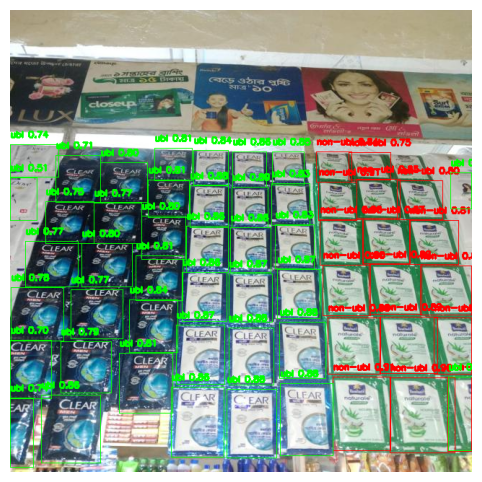

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLOv8 model
model = YOLO("runs/detect/train2/weights/best.pt")  # Path to your trained model

# Define test image path
image_path = "/ML/ubl vs non-ubl/data_dir/valid/images/sh9_jpeg.rf.7c10e0d17ffbfad034c966a5afa8d6f7.jpg"  # Change this to your actual test image

# Run inference
results = model(image_path)

# Process and visualize the results
for result in results:
    # Load image with OpenCV
    img = cv2.imread(image_path)

    # Loop through detected objects
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        conf = box.conf[0].item()  # Confidence score
        cls = int(box.cls[0].item())  # Class ID

        # Get class name from YOLO model
        class_name = model.names[cls]

        # Define a color map for your classes
        color_map = {
            0: (0, 0, 255),    # Green for first class
            1: (0, 255, 0)     # Red for second class
            }
        # Get the color for this class
        box_color = color_map.get(cls, (0, 255, 0))  # Default to green if class not in map
        
        # Draw bounding box with class-specific color
        cv2.rectangle(img, (x1, y1), (x2, y2), box_color, 1)
        cv2.putText(img, f"{class_name} {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, box_color, 2)

    # Convert BGR to RGB for Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    output_path = "/ML/ubl vs non-ubl/output/output_image.jpg"  # You can change the path and filename as needed
    cv2.imwrite(output_path, img)
    print(f"Annotated image saved to {output_path}")

    # Show image with bounding boxes
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

In [16]:
# Run validation to see performance metrics
metrics = model.val()

print("📊 Model Performance:")
print(f"mAP50: {metrics.box.map50:.3f}")
print(f"mAP50-95: {metrics.box.map:.3f}")

Ultralytics 8.3.89  Python-3.13.2 torch-2.7.0.dev20250311+cu128 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)


val: Scanning E:\ML\ubl vs non-ubl\data_dir\valid\labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.81s/it]


                   all         25       1582      0.802      0.755      0.805      0.445
               non-ubl         17        603       0.77       0.67      0.746      0.419
                   ubl         22        979      0.835       0.84      0.865      0.471
Speed: 1.7ms preprocess, 14.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\val4
📊 Model Performance:
mAP50: 0.805
mAP50-95: 0.445
